In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing neccessary packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [3]:
#read from a file
df=pd.read_csv('/content/drive/MyDrive/SVM/mushrooms-full-dataset.csv')
df.head(3)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [4]:
#check if thair is missing value
df.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#vertical split
target=df['poisonous']
input=df.drop(['poisonous'],axis=1)
print('target',target.shape)
print('input',input.shape)

target (8124,)
input (8124, 21)


In [6]:
#horizontal split
x_train,x_test,y_train,y_test=train_test_split(input,
                                               target,
                                               test_size=0.2,
                                               random_state=40,
                                               stratify=target)

In [7]:
#counting values
y_train.value_counts()

e    3366
p    3133
Name: poisonous, dtype: int64

In [8]:
#counting values
y_test.value_counts()

e    842
p    783
Name: poisonous, dtype: int64

In [9]:
#instanciating encoders and labelers
enc_1=OrdinalEncoder()#transform catagorical data in to numerical
enc_2=LabelEncoder() #preserving the target label

In [10]:
#xtrain encoding 
x_train_transf= enc_1.fit_transform(x_train)
x_test_transf=enc_1.transform(x_test)
#y_train encode and label
y_train_transf=enc_2.fit_transform(y_train)
y_test_transf=enc_2.transform(y_test)

In [12]:
#observation
x_train_transf

array([[2., 0., 8., ..., 3., 4., 0.],
       [2., 3., 9., ..., 2., 5., 1.],
       [2., 2., 4., ..., 3., 3., 1.],
       ...,
       [2., 0., 3., ..., 2., 5., 0.],
       [5., 3., 4., ..., 7., 4., 0.],
       [5., 3., 3., ..., 3., 5., 0.]])

In [11]:
#observation
y_train_transf

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
# rescaling   svm needs unique scaling   the input need to be in range from [-1,1]
scaler=MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)
x_train_rescaled=scaler.transform(x_train_transf)

#simple linear svm

In [14]:
#instanciating and traiing model using x_train_scaled data
c=1
svm=SVC(kernel='linear',C=c).fit(x_train_rescaled,y_train_transf)

In [15]:
#seeing how the model performs on test data
y_pred_test=svm.predict(scaler.transform(x_test_transf))

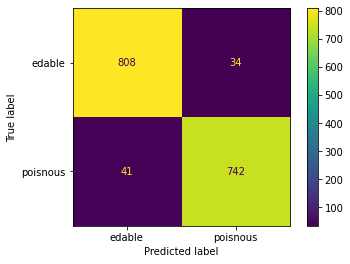

In [27]:
#confusion metrics
cmap=ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf,y_pred_test),
    display_labels=['edable','poisnous'])
cmap.plot();

In [17]:
#using other metrics other than accuracy
print(classification_report(y_test_transf,y_pred_test,target_names=['edable','poisnous']))

              precision    recall  f1-score   support

      edable       0.95      0.96      0.96       842
    poisnous       0.96      0.95      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



#hyperparameter tunning


1.   kernel
2.   C value



In [21]:
# parameters to tune
tuned_parameter=[
    {
        'kernel':['linear'],  "C":[1,10],
       'kernel':['poly'],   "C":[1,10]
      # 'kernel':['rbf']  ,  "gamma":[1e-3,1e-4],  "C":[1,10]    #gamma contols the radius of the area of sv boundery ,  large gamma-model overfit,small gamma-model underfit
     
      }
]

In [22]:
scores=['precision','recall']

In [23]:
#using for loops to find best params
for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()
  clf=GridSearchCV( SVC(),tuned_parameter,scoring="%s_macro"% score)
  clf.fit(x_train_rescaled,y_train_transf)
  print("Best parameter set found on development set:")
  print()
  print(clf.best_params_)
  print()
  print("Grid scores on development set :")
  print()
  means=clf.cv_results_['mean_test_score']
  stds=clf.cv_results_['std_test_score']
  for mean,std,params in zip(means,stds,clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean,std *2,params))
  print()

  y_true,y_pred=y_test_transf,clf.predict(scaler.transform(x_test_transf))
  print(classification_report(y_true,y_pred))

# Tuning hyper-parameters for precision

Best parameter set found on development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set :

1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

# Tuning hyper-parameters for recall

Best parameter set found on development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set :

1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy      

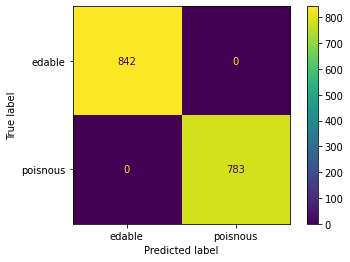

In [26]:
#confusion metrics
cmap=ConfusionMatrixDisplay(
    confusion_matrix(y_true,y_pred),
    display_labels=['edable','poisnous'])
cmap.plot();